In [ ]:
!unzip mnist.zip



Obtenga las curvas de los score loss, f1_score y accuracy para los sets de entrenamiento y validación **usando diferentes tamaños del set de entrenamiento (10%, 20%, 50%, 80% y 100%)** cuando el conjunto de validación es completo. i) Indique cuál es la importancia del tamaño del conjunto de entrenamiento ii) Compare las curvas de entrenamiento y validación usando los 3 scores y iii) haga un breve análisis de los resultado obtenidos



**set de entrenamiento (10%,20%, 50%, 80% y 100%)**

Train10%
Sobre set de testeo:loss: 0.6939491033554077, f1: 0.8625971781798543, acc: 0.8639112710952759


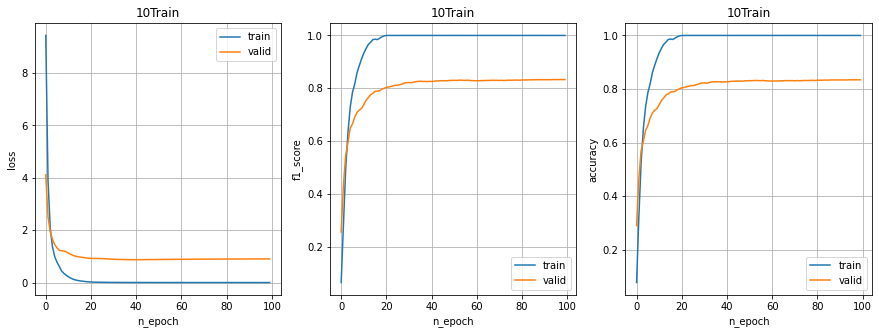

-----------------------------
Train20%
Sobre set de testeo:loss: 0.5975553393363953, f1: 0.8571783337633272, acc: 0.8578628897666931


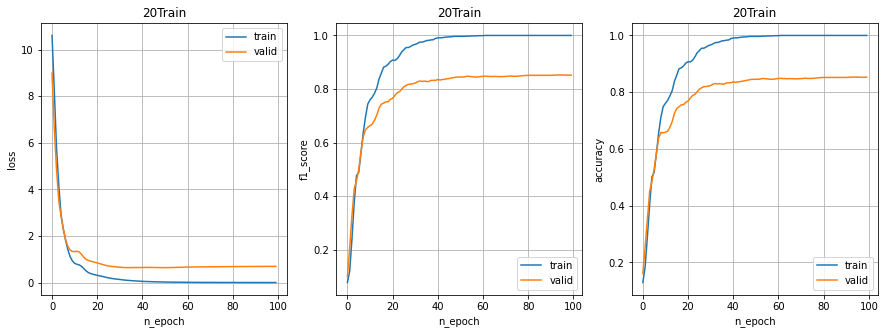

-----------------------------
Train50%
Sobre set de testeo:loss: 0.30587735772132874, f1: 0.9150336279232436, acc: 0.9153226017951965


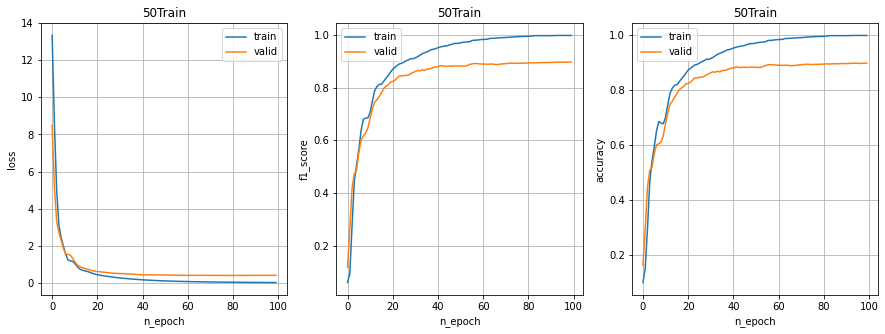

-----------------------------
Train80%
Sobre set de testeo:loss: 0.37941664457321167, f1: 0.9105732522572083, acc: 0.9112903475761414


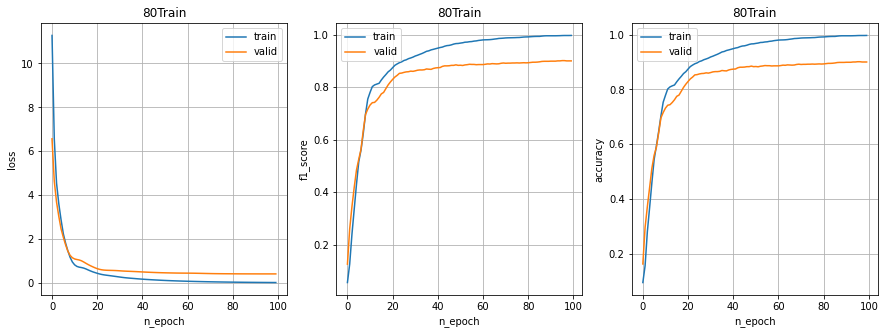

-----------------------------
Train100%
Sobre set de testeo:loss: 0.323912650346756, f1: 0.9159370972689947, acc: 0.9163306355476379


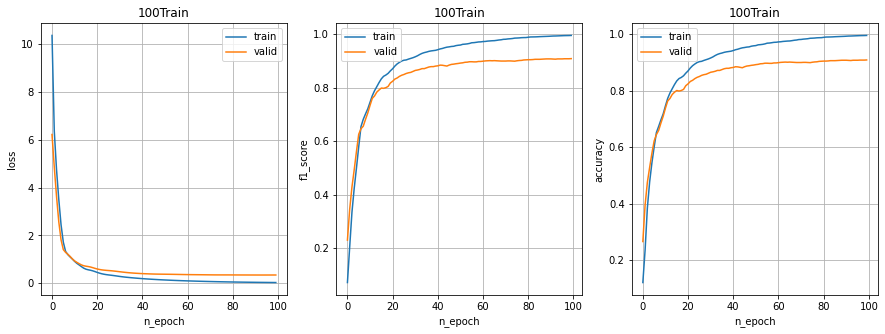

-----------------------------


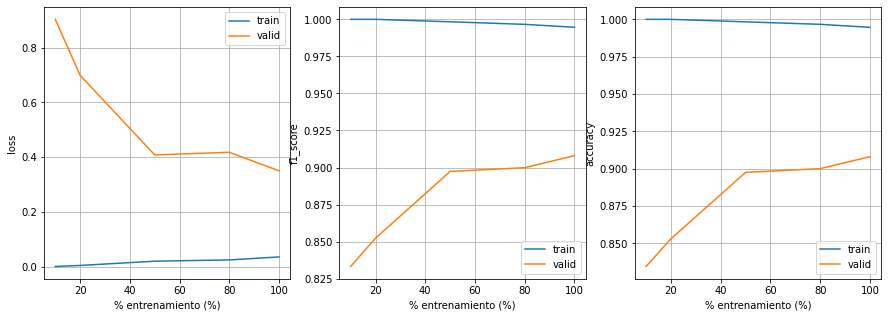

In [64]:
 per=[1,2,5,8,10]

 loss_train_list=[]
 f1_train_list=[]
 acc_train_list=[]

 loss_valid_list=[]
 f1_valid_list=[]
 acc_valid_list=[]

 for i in range(len(per)):
  print('Train'+str(per[i]*10)+'%')
  

  from glob import glob

  train_files = glob('./mnist/train/*/*.png')
  valid_files = glob('./mnist/valid/*/*.png')
  test_files = glob('./mnist/test/*/*.png')

  train_files[0]

  #--- Ordenamos los datos de forma aleatoria para evitar sesgos
  import numpy as np

  np.random.shuffle(train_files)
  np.random.shuffle(valid_files)
  np.random.shuffle(test_files)

  len(train_files), len(valid_files), len(test_files)

  #--- Cargamos los datos de entrenamiento en listas
  from PIL import Image

  N_train = len(train_files)
  X_train = []
  Y_train = []

  for j, train_file in enumerate(train_files):
    Y_train.append( int(train_file.split('/')[3]) )
    X_train.append(np.array(Image.open(train_file)))
  
  x_train_per = per[i]*600

  X_train = X_train[0:x_train_per]
  Y_train = Y_train[0:x_train_per]

  #--- Cargamos los datos de validación en listas
  N_valid = len(valid_files)
  X_valid = []
  Y_valid = []

  for k, valid_file in enumerate(valid_files):
    Y_valid.append( int(valid_file.split('/')[3]) )
    X_valid.append( np.array(Image.open(valid_file)) )

  #--- Cargamos los datos de testeo en listas
  N_test = len(test_files)
  X_test = []
  Y_test = []

  for h, test_file in enumerate(test_files):
    Y_test.append( int(test_file.split('/')[3]) )
    X_test.append( np.array(Image.open(test_file)) )

  len(X_train), len(Y_train), len(X_valid), len(Y_valid)

  #--- Convertimos las listas de datos a tensores de torch
  import torch
  from torch.autograd import Variable

  X_train = Variable(torch.from_numpy(np.array(X_train))).float()
  Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

  X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
  Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

  X_test = Variable(torch.from_numpy(np.array(X_test))).float()
  Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

  X_train.data.size()

  #--- Definimos una ANN con dos capas ocultas lineales de 100 neuronas

  input_dim = 28*28
  out_dim = 10
  hidden = 100

  model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden),
    torch.nn.ReLU(), 
    torch.nn.Linear(hidden, hidden),
    torch.nn.ReLU(),       
    torch.nn.Linear(hidden, out_dim)
  )

  optimizer = torch.optim.Adam(model.parameters())
  criterion = torch.nn.CrossEntropyLoss()

  from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

  #-- Número de épocas
  n_epoch = 100

  #-- Listas de evaluación entrenamiento
  loss_train = []
  f1_train = []
  acc_train = []

  #-- Listas de evaluación validación
  loss_valid = []
  f1_valid = []
  acc_valid = []

  #-- Entrenamineto de la ANN
  for epoch in range(n_epoch):
    model.train()
    
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
    
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    #print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

    model.eval()
    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc)
  
  loss_train_list.append(loss_train[-1])
  f1_train_list.append(f1_train[-1])
  acc_train_list.append(acc_train[-1])

  loss_valid_list.append(loss_valid[-1])
  f1_valid_list.append(f1_valid[-1])
  acc_valid_list.append(acc_valid[-1])

 #-- Evaluamos el modelo entrenado con el set de testeo

  model.eval()

  Xts = X_test.view(X_test.size(0), -1)
  Y_pred = model(Xts)  
  loss = criterion(Y_pred,Y_test)

  Y_pred = torch.argmax(Y_pred, 1)
  f1 = f1_score(Y_test, Y_pred, average='macro')

  acc = sum(Y_test == Y_pred)/len(Y_pred)

  print('Sobre set de testeo:'+'loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))


  #-- Visualizamos las curvas de entrenamiento y validación

  per_name= str(per[i]*10)

  fig = plt.figure(figsize=(15,5))
  plt.subplot(1,3,1)
  plt.plot(range(n_epoch), loss_train, label='train')
  plt.plot(range(n_epoch), loss_valid, label='valid')
  plt.xlabel('n_epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.title(per_name+'Train')
  plt.grid()
  plt.subplot(1,3,2)
  plt.plot(range(n_epoch), f1_train, label='train')
  plt.plot(range(n_epoch), f1_valid, label='valid')
  plt.xlabel('n_epoch')
  plt.ylabel('f1_score')
  plt.legend()
  plt.title(per_name+'Train')
  plt.grid()
  plt.subplot(1,3,3)
  plt.plot(range(n_epoch), acc_train, label='train')
  plt.plot(range(n_epoch), acc_valid, label='valid')
  plt.xlabel('n_epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.title(per_name+'Train')
  plt.grid()

  plt.savefig('./curves_ok_train'+per_name+'.png', bbox_inches='tight')
  plt.show()

  print('-----------------------------')


#-- Visualizamos las curvas de entrenamiento y validación para cada porcentaje

per_tot=[10,20,50,80,100]

fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(per_tot, loss_train_list, label='train')
plt.plot(per_tot, loss_valid_list, label='valid')
plt.xlabel('% entrenamiento (%)')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(per_tot, f1_train_list, label='train')
plt.plot(per_tot, f1_valid_list, label='valid')
plt.xlabel('% entrenamiento (%)')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(per_tot, acc_train_list, label='train')
plt.plot(per_tot, acc_valid_list, label='valid')
plt.xlabel('% entrenamiento (%)')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok_entrenamientos.png', bbox_inches='tight')
plt.show()


  

**COnclusiones variacion de Porcentajes en entrenamiento:**

la curva de validacion del modelo tiene su mayor valor al usar el 100% de los datos en el caso del f1 y el accuracy. el loss lambien parece ser optimo al usar todos los datos. Apesar de lo santerior, no se observa una mejora sustancial de los resultados despues de utilizar aproximadamente el 50%

**....................................**


Para un modelo entrenado **con el 100% de los datos de entrenamiento y 100% validación pruebe diferentes tamaños del conjunto de testeo para evaluar (10%, 20%, 50%, 80% y 100%)** e imprima los 3 scores en cada caso. i) Indique cuál es la importancia del tamaño del conjunto de testeo ii) Compare los score obtenidos en cada caso y iii) haga un breve análisis de los resultado obtenidos.

**conjunto de testeo para evaluar (10%, 20%, 50%, 80% y 100%)**

Train10%
Sobre set de testeo:loss: 0.1910320371389389, f1: 0.9337985726780295, acc: 0.939393937587738


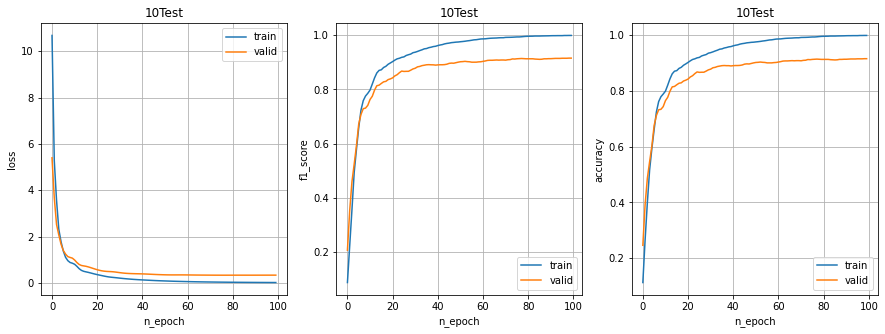

-----------------------------
Train20%
Sobre set de testeo:loss: 0.4448447525501251, f1: 0.9028766572181206, acc: 0.9040403962135315


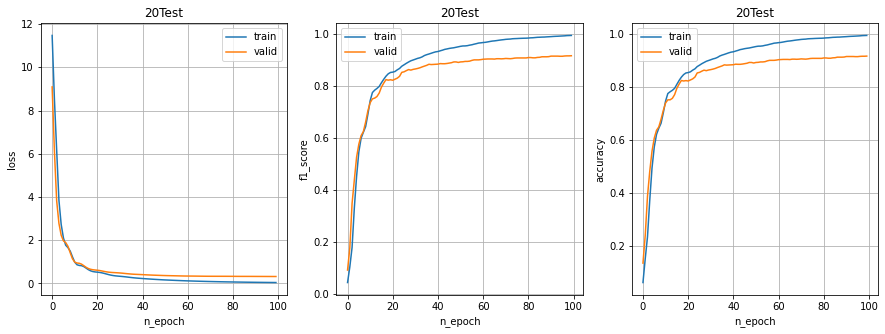

-----------------------------
Train50%
Sobre set de testeo:loss: 0.33793923258781433, f1: 0.9209509301152728, acc: 0.9212121367454529


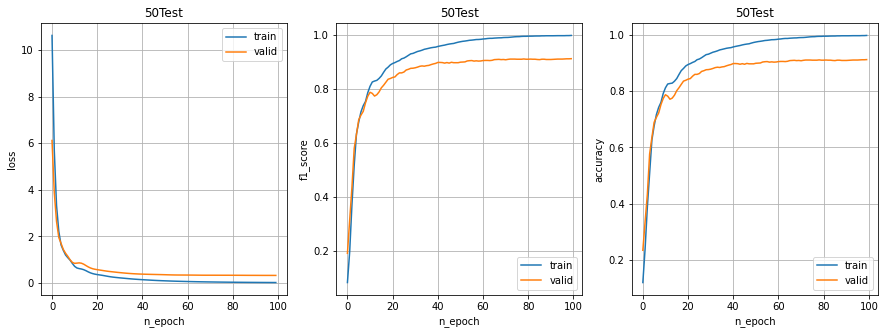

-----------------------------
Train80%
Sobre set de testeo:loss: 0.27770042419433594, f1: 0.9300691445757299, acc: 0.9305555820465088


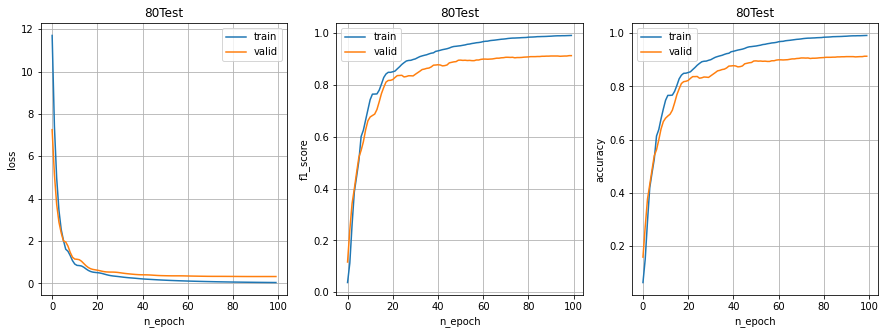

-----------------------------
Train100%
Sobre set de testeo:loss: 0.35103753209114075, f1: 0.919727357889634, acc: 0.9202020168304443


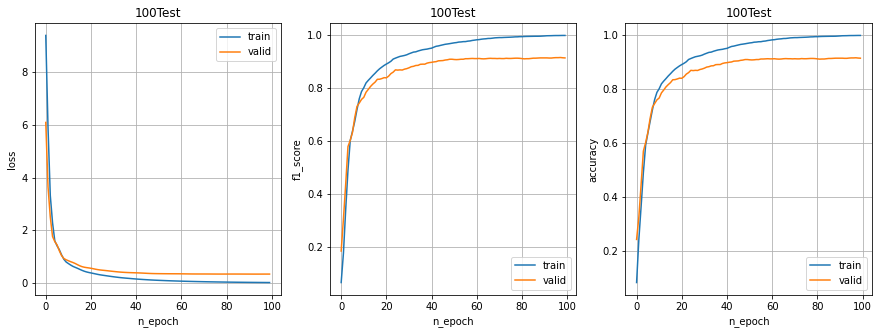

-----------------------------


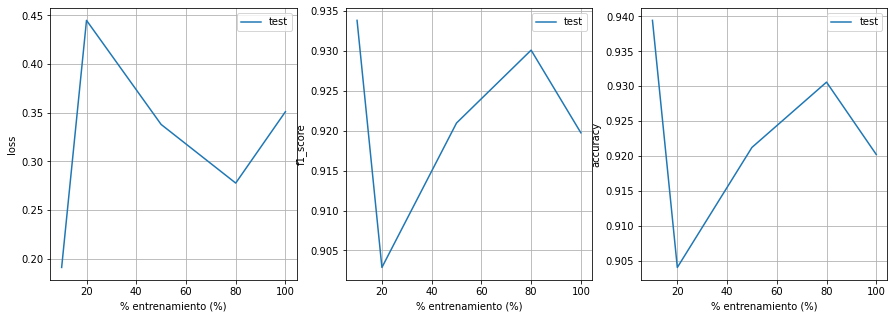

In [65]:
 per=[1,2,5,8,10]

 loss_test_list=[]
 f1_test_list=[]
 acc_test_list=[]



 for i in range(len(per)):
  print('Train'+str(per[i]*10)+'%')
  

  from glob import glob

  train_files = glob('./mnist/train/*/*.png')
  valid_files = glob('./mnist/valid/*/*.png')
  test_files = glob('./mnist/test/*/*.png')

  train_files[0]

  #--- Ordenamos los datos de forma aleatoria para evitar sesgos
  import numpy as np

  np.random.shuffle(train_files)
  np.random.shuffle(valid_files)
  np.random.shuffle(test_files)

  len(train_files), len(valid_files), len(test_files)

  #--- Cargamos los datos de entrenamiento en listas
  from PIL import Image

  N_train = len(train_files)
  X_train = []
  Y_train = []

  for j, train_file in enumerate(train_files):
    Y_train.append( int(train_file.split('/')[3]) )
    X_train.append(np.array(Image.open(train_file)))
  
  

  

  #--- Cargamos los datos de validación en listas
  N_valid = len(valid_files)
  X_valid = []
  Y_valid = []

  for k, valid_file in enumerate(valid_files):
    Y_valid.append( int(valid_file.split('/')[3]) )
    X_valid.append( np.array(Image.open(valid_file)) )

  #--- Cargamos los datos de testeo en listas
  N_test = len(test_files)
  X_test = []
  Y_test = []

  for h, test_file in enumerate(test_files):
    Y_test.append( int(test_file.split('/')[3]) )
    X_test.append( np.array(Image.open(test_file)) )
  
  x_test_per = per[i]*99
  X_test = X_test[0:x_test_per]
  Y_test = Y_test[0:x_test_per]

  len(X_train), len(Y_train), len(X_valid), len(Y_valid)

  #--- Convertimos las listas de datos a tensores de torch
  import torch
  from torch.autograd import Variable

  X_train = Variable(torch.from_numpy(np.array(X_train))).float()
  Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

  X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
  Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

  X_test = Variable(torch.from_numpy(np.array(X_test))).float()
  Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

  X_train.data.size()

  #--- Definimos una ANN con dos capas ocultas lineales de 100 neuronas

  input_dim = 28*28
  out_dim = 10
  hidden = 100

  model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden),
    torch.nn.ReLU(), 
    torch.nn.Linear(hidden, hidden),
    torch.nn.ReLU(),       
    torch.nn.Linear(hidden, out_dim)
  )

  optimizer = torch.optim.Adam(model.parameters())
  criterion = torch.nn.CrossEntropyLoss()

  from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

  #-- Número de épocas
  n_epoch = 100

  #-- Listas de evaluación entrenamiento
  loss_train = []
  f1_train = []
  acc_train = []

  #-- Listas de evaluación validación
  loss_valid = []
  f1_valid = []
  acc_valid = []

  #-- Entrenamineto de la ANN
  for epoch in range(n_epoch):
    model.train()
    
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
    
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    #print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

    model.eval()
    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc)
  


 #-- Evaluamos el modelo entrenado con el set de testeo

  model.eval()

  Xts = X_test.view(X_test.size(0), -1)
  Y_pred = model(Xts)  
  loss = criterion(Y_pred,Y_test)

  Y_pred = torch.argmax(Y_pred, 1)
  f1 = f1_score(Y_test, Y_pred, average='macro')

  acc = sum(Y_test == Y_pred)/len(Y_pred)



  print('Sobre set de testeo:'+'loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

  loss_test_list.append(loss.item())
  f1_test_list.append(f1)
  acc_test_list.append(acc)


  #-- Visualizamos las curvas de entrenamiento y validación

  per_name= str(per[i]*10)

  fig = plt.figure(figsize=(15,5))
  plt.subplot(1,3,1)
  plt.plot(range(n_epoch), loss_train, label='train')
  plt.plot(range(n_epoch), loss_valid, label='valid')
  plt.xlabel('n_epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.title(per_name+'Test')
  plt.grid()
  plt.subplot(1,3,2)
  plt.plot(range(n_epoch), f1_train, label='train')
  plt.plot(range(n_epoch), f1_valid, label='valid')
  plt.xlabel('n_epoch')
  plt.ylabel('f1_score')
  plt.legend()
  plt.title(per_name+'Test')
  plt.grid()
  plt.subplot(1,3,3)
  plt.plot(range(n_epoch), acc_train, label='train')
  plt.plot(range(n_epoch), acc_valid, label='valid')
  plt.xlabel('n_epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.title(per_name+'Test')
  plt.grid()

  plt.savefig('./curves_ok_test'+per_name+'.png', bbox_inches='tight')
  plt.show()

  print('-----------------------------')


#-- Visualizamos las curvas de entrenamiento y validación para cada porcentaje

per_tot=[10,20,50,80,100]

fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(per_tot, loss_test_list, label='test')

plt.xlabel('% entrenamiento (%)')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(per_tot, f1_test_list, label='test')

plt.xlabel('% entrenamiento (%)')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(per_tot, acc_test_list, label='test')

plt.xlabel('% entrenamiento (%)')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok_test.png', bbox_inches='tight')
plt.show()



**COnclusiones variacion de Porcentajes en test:**

las curvas sugieren qeu lo mejor es utilizar el 80% de los datos, pues es en donde el loss es minimo, f1 es maximo y accuracy es mayimo tambien.